# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
- 각 Feature들에 가중치(Weight)를 곱하고 편향(bias)를 더해 예측 결과를 출력한다.
- Weight와 bias가 학습 대상 Parameter가 된다.

$$
\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b
\\
\hat{y_i} = \mathbf{w}^{T} \cdot \mathbf{X} 
$$

- $\hat{y_i}$: 예측값
- $x$: 특성(feature-컬럼)
- $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 절편
- $p$: p 번째 특성(feature)/p번째 가중치
- $i$: i번째 관측치(sample)

## LinearRegression
- 가장 기본적인 선형 회귀 모델
- 각 Feauture에 가중합으로 Y값을 추론한다.
### 데이터 전처리

- **선형회귀 모델사용시 전처리**
    - **범주형 Feature**
        - : 원핫 인코딩
    - **연속형 Feature**
        - Feature Scaling을 통해서 각 컬럼들의 값의 단위를 맞춰준다.
        - StandardScaler를 사용할 때 성능이 더 잘나오는 경향이 있다.

In [1]:
from dataset import get_boston_dataset
X_train, X_test, y_train, y_test = get_boston_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [2]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# 선형회귀 모델 생성
from sklearn.linear_model import LinearRegression
line_reg = LinearRegression()   # 하이퍼 파라미터가 따로 없음
line_reg.fit(X_train_scaled, y_train)

LinearRegression()

> ### Coeficient의 부호
> - weight가 
> - 양수: Feature가 1 증가할때 y(집값)도 weight만큼 증가한다.
> - 음수: Feature가 1 증가할때 y(집값)도 weight만큼 감소한다.
> - 절대값 기준으로 0에 가까울 수록 집값에 영향을 주지 않고 크면 클수록(0에서 멀어질 수록) 집값에 영향을 많이 주는 Feature 란 의미가 된다.

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [4]:
# 각 feature의 계수 -> 각 항에 곱해지는 값
import pandas as pd
pd.DataFrame(line_reg.coef_, index=X_train.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.460911,1.048771,-0.166722,0.880277,-1.979566,2.249428,0.339677,-2.862308,2.323268,-1.557996,-2.136995,0.900559,-4.104937


In [5]:
# bias (절편)
line_reg.intercept_

22.579419525065966

In [6]:
X_ = X_train.copy()
X_['y'] = y_train
X_

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
390,6.96215,0.0,18.10,0.0,0.700,5.713,97.0,1.9265,24.0,666.0,20.2,394.43,17.11,15.1
474,8.05579,0.0,18.10,0.0,0.584,5.427,95.4,2.4298,24.0,666.0,20.2,352.58,18.14,13.8
28,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4.0,307.0,21.0,387.94,12.80,18.4
343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18,23.9
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.36894,22.0,5.86,0.0,0.431,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00,21.1
442,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59,18.4
291,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56,37.3


#### 각 항목에 대한 추론방식
##### $coef_0 \times x_0 + coef_1 \times x_1 + coef_2 \times x_2 + ... + coef_n \times x_n + bias = y(pred)$

In [7]:
# 0번째 데이터에 대한 추론
pred_0 = line_reg.predict(X_train_scaled[0].reshape(1, -1))
pred_0

array([17.59767048])

In [8]:
# 0번째 데이터에 대한 추론
# 각 항목에 계수값을 내적한 후 bias를 더함
X_train_scaled[0] @ line_reg.coef_ + line_reg.intercept_

17.597670478245465

In [9]:
# 데이터에 대한 추론
pred2_ = X_train_scaled @ line_reg.coef_.reshape(-1, 1) + line_reg.intercept_
pred2_

array([[17.59767048],
       [16.91806808],
       [19.72403743],
       [28.02021706],
       [21.26422083],
       [17.74527355],
       [17.53706079],
       [17.36472947],
       [17.95706279],
       [18.94759392],
       [19.75772585],
       [35.6421676 ],
       [27.61639663],
       [16.53717978],
       [22.34949546],
       [20.69679461],
       [31.88966091],
       [12.24853538],
       [13.76485428],
       [24.02415759],
       [16.14926316],
       [13.82614283],
       [16.34871575],
       [27.79140705],
       [23.50303613],
       [28.45852287],
       [23.6437011 ],
       [19.94909904],
       [21.25320755],
       [ 9.7484128 ],
       [31.57785985],
       [21.48068719],
       [25.89597626],
       [36.31811948],
       [18.20270308],
       [21.46196844],
       [20.44547369],
       [12.83920746],
       [20.97170464],
       [18.01456364],
       [40.59313252],
       [31.8823775 ],
       [21.27076911],
       [29.86339282],
       [22.99333532],
       [23

In [10]:
pred2_.flatten() == line_reg.predict(X_train_scaled)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

##### 평가

In [11]:
pred_train = line_reg.predict(X_train_scaled)
pred_test = line_reg.predict(X_test_scaled)

from metrics import print_metrics_regression as pmr

pmr(y_train, pred_train, title='Linear Regression train')
pmr(y_test, pred_test, title='Linear Regression test')

==========Linear Regression train==========
MAE: 3.3851968027571853
MSE: 23.327378902305774
RMSE: 4.829842533903748
R2 Score: 0.717672243569379
==========Linear Regression test==========
MAE: 3.1635051115298656
MSE: 18.96659799622575
RMSE: 4.35506578552216
R2 Score: 0.788669757494949


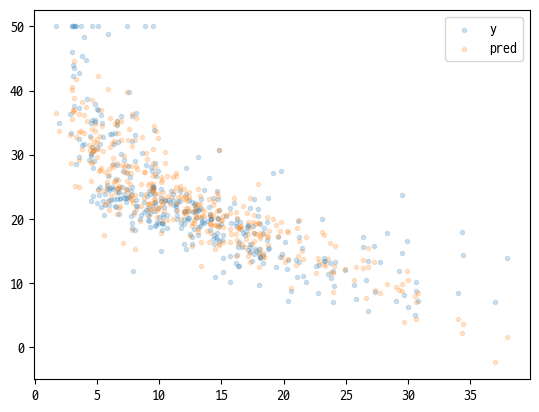

In [12]:
# X값에 대한 y값과 추론값의 scatter plot
import matplotlib.pyplot as plt
plt.scatter(X_train['LSTAT'], y_train, label='y', alpha=0.2, marker='.')
plt.scatter(X_train['LSTAT'], pred_train, label='pred', alpha=0.2, marker='.')
plt.legend()
plt.show()

In [13]:
y_test_array = y_test.values

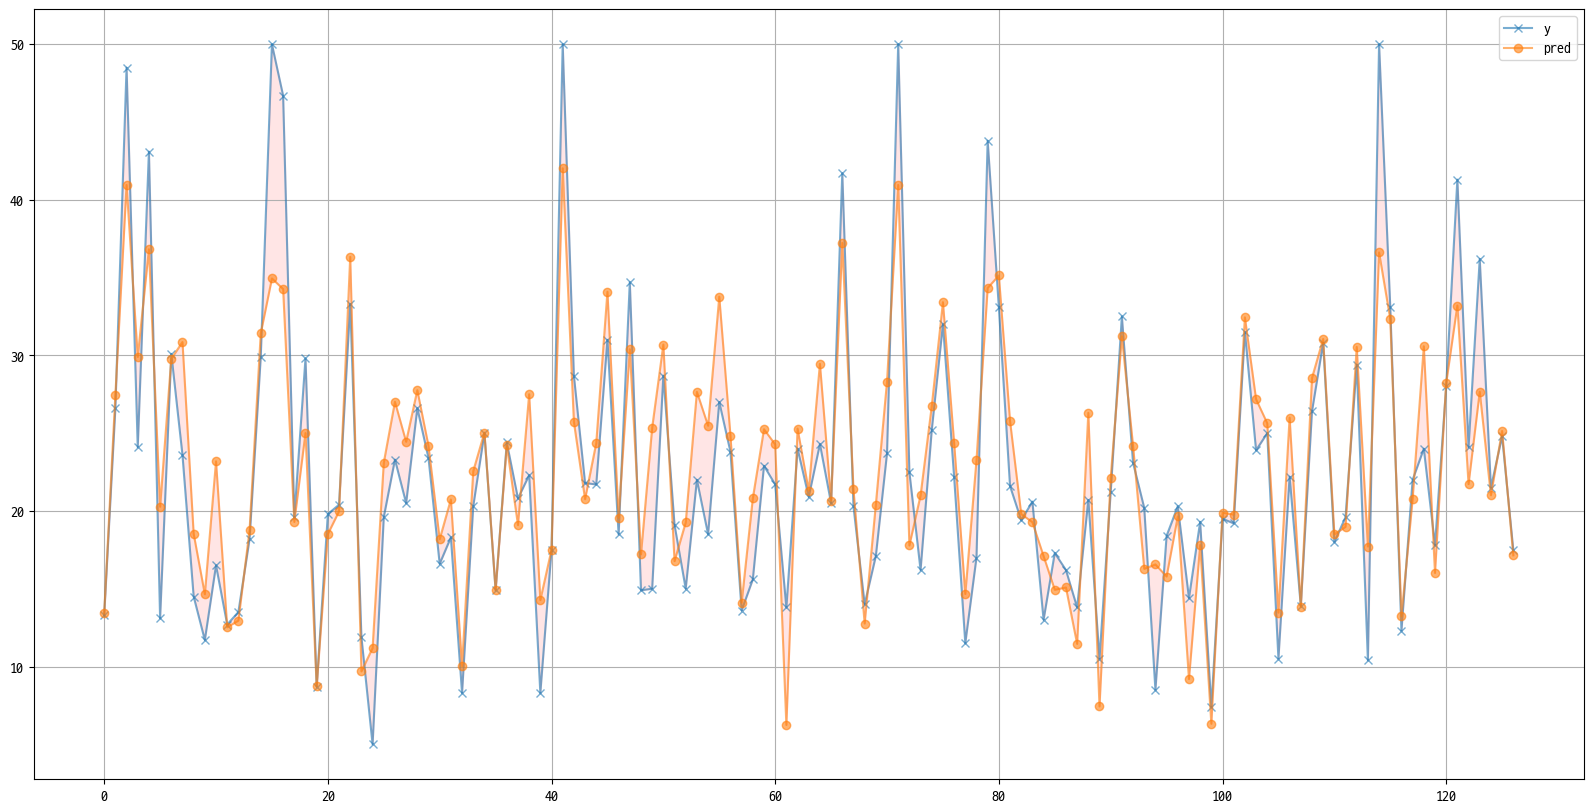

In [14]:
# y값과 추론값의 비교 (x축은 index)
x= range(len(y_test))
plt.figure(figsize=(20, 10))
plt.plot(x, y_test, label='y', marker='x', alpha=0.6)
plt.plot(x, pred_test, label='pred', marker='o', alpha=0.6)
# # 각 데이터에 대한 실제값과 추론값의 차이를 각 자리에 표시
# for i in x:
#     plt.plot([i, i], [y_test_array[i], pred_test[i]], color='red', alpha=.8)
# 각 데이터 사이를 채움
plt.fill_between(x, y_test_array, pred_test, color='red', alpha=.1)

plt.legend()
plt.grid()
plt.show()


# 다항회귀 (Polynomial Regression)
- 전처리방식 중 하나로 Feature가 너무 적어 y의 값들을 다 설명하지 못하여 underfitting이 된 경우 Feature를 늘려준다.
- 각 Feature들을 거듭제곱한 것과 Feature들 끼리 곱한 새로운 특성들을 추가한다.
    - 파라미터 가중치를 기준으로는 일차식이 되어 선형모델이다. 입력데이터(X)들을 기준으로는 N차식이 되어 비선형 데이터를 추론할 수 있는 모델이 된다.
- `PolynomialFeatures` Transformer를 사용해서 변환한다.

## 예제

##### 데이터셋 만들기

In [2]:
# 다항회귀 (Polynomial Regression)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
# x**2 + x + 2 + noise
f = lambda x: x**2 + x + 2 + np.random.normal(0, 1, (x.size, 1))

In [3]:
# 데이터 만들기
# 데이터 갯수
m = 300
# -3~3 사이의 값을 m개 생성
X = 6 * np.random.rand(m, 1) - 3
y = f(X)

In [4]:
from test_color.color_list import rand_hex_list_hsv
colors = rand_hex_list_hsv(10, s=.8, v=.8)

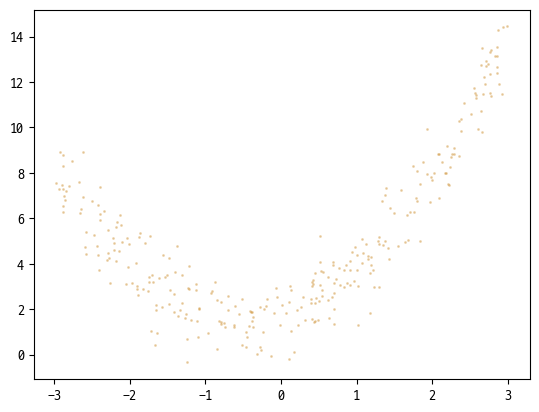

In [5]:
# 데이터 시각화
plt.scatter(X, y, s=5, alpha=0.3, marker='.', color=colors[1])
plt.show()

##### 모델생성, 학습

In [6]:
# 모델 생성
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 1차항
line_reg_1 = LinearRegression()
line_reg_1.fit(X, y)
pred_y = line_reg_1.predict(X)

In [7]:
# 계수와 bias 확인
line_reg_1.coef_, line_reg_1.intercept_

(array([[0.97292665]]), array([4.92322873]))

### $0.96042043 \times x_{data} + 4.989578 = y_{pred}$

In [8]:
from test_color.color_list import rand_hex_list_hsv
colors = rand_hex_list_hsv(10, s=1.0, v=1.0)

==========1차항==========
MAE: 2.551693678175459
MSE: 8.948054466935286
RMSE: 2.991329882666786
R2 Score: 0.24257167903303778


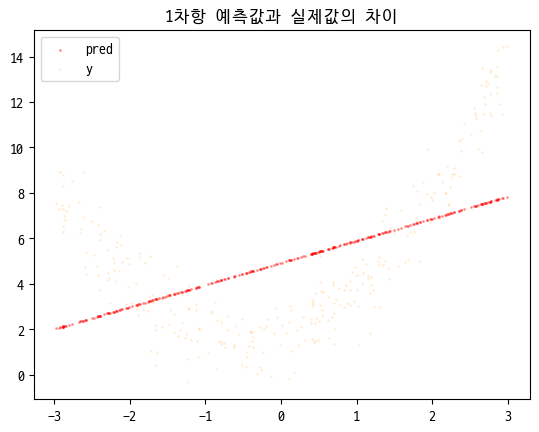

In [9]:
from metrics import print_metrics_regression as pmr
pmr(y, pred_y, title='1차항')

# pred_y와 y의 차이
plt.scatter(X, pred_y, s=5, alpha=0.3, marker='.', color=colors[0])
plt.scatter(X, y, s=5, alpha=0.1, marker='.', color=colors[1])
plt.legend(['pred', 'y'])
plt.title('1차항 예측값과 실제값의 차이')
plt.show()

In [10]:
X_new = np.linspace(-5, 5, 10000).reshape(-1, 1)
X_new.shape

(10000, 1)

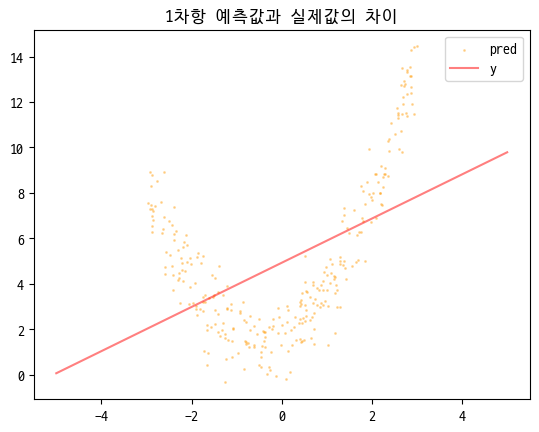

In [11]:
pred_y_new = line_reg_1.predict(X_new)
# 시각화
plt.scatter(X, y, s=5, alpha=0.3, marker='.', color=colors[1])
plt.plot(X_new, pred_y_new, color=colors[0], alpha=0.5)
plt.title('1차항 예측값과 실제값의 차이')
plt.legend(['pred', 'y'])
plt.show()

##### PolynomialFeatures를 이용해 다항회귀구현

In [12]:
# 다항회귀 구현
# 2차항
poly_features = PolynomialFeatures(degree=2, include_bias=False) # include_bias=False : bias는 계산하지 않음
X_poly = poly_features.fit_transform(X)
X_poly.shape

(300, 2)

In [13]:
# 2차항의 데이터를 선형회귀에 적용
line_reg_2 = LinearRegression()
line_reg_2.fit(X_poly, y)

LinearRegression()

In [14]:
# 계수와 bias 확인
line_reg_2.coef_, line_reg_2.intercept_

(array([[0.95092301, 1.03576481]]), array([1.78757977]))

### $1.00316014 \times x^2 + 0.99393584 \times x + 2.02008493$

##### LinearRegression 모델을 이용해 평가

In [15]:
X_new_poly = poly_features.transform(X_new)
pred_y_poly = line_reg_2.predict(X_poly)
pred_y_new_poly = line_reg_2.predict(X_new_poly)

from metrics import print_metrics_regression as pmr
pmr(y, pred_y_poly, title='2차항')

==========2차항==========
MAE: 0.7881548606702193
MSE: 0.9726390569496041
RMSE: 0.9862246483178181
R2 Score: 0.9176687658155762


##### 시각화

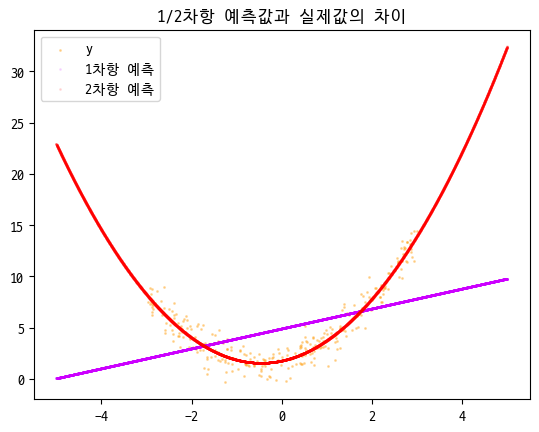

In [16]:
# pred_y와 y의 차이
plt.scatter(X, y, s=5, alpha=0.3, marker='.', color=colors[1])
plt.scatter(X_new, pred_y_new, s=5, alpha=0.1, marker='.', color=colors[8])
plt.scatter(X_new, pred_y_new_poly, s=5, alpha=0.1, marker='.', color=colors[0])
plt.legend(['y', '1차항 예측', '2차항 예측'])
plt.title('1/2차항 예측값과 실제값의 차이')
plt.show()

## degree를 크게
- Feature가 너무 많으면 Overfitting 문제가 생긴다.

In [17]:
# degree 별로 비교
from sklearn.pipeline import Pipeline, make_pipeline
degrees = [1, 2, 5, 10, 500]
X_new = np.linspace(-5, 5, 10000).reshape(-1, 1)
preds = []
for degree in degrees:
    pl = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        LinearRegression()
    )
    pl.fit(X, y)
    pred = pl.predict(X)
    preds.append(pred)

In [18]:
# degree 별로 비교

degrees = [1, 2, 3, 4, 10, 20, 30, 40, 100, 200]
m = 100
X = 6 * np.random.rand(m, 1) - 3
X.sort(axis=0)
y = f(X)
X_new = np.linspace(-10, 10, 50000).reshape(-1, 1)

In [19]:
from metrics import print_metrics_regression as pmr
coef_bias = []
train_preds = []
test_preds = []
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    line_reg = LinearRegression()
    line_reg.fit(X_poly, y)
    coef_bias.append([line_reg.coef_, line_reg.intercept_])    
    X_new_poly = poly_features.transform(X_new)
    pred_y_new_poly = line_reg.predict(X_new_poly)
    pred_y_poly = line_reg.predict(X_poly)
    train_preds.append(pred_y_poly)
    test_preds.append(pred_y_new_poly)
    pmr(y, pred_y_poly, title=f'{degree}차항, train')

==========1차항, train==========
MAE: 2.496836046956746
MSE: 8.311012002624288
RMSE: 2.882882585646576
R2 Score: 0.3195013888353174
==========2차항, train==========
MAE: 0.787513025646582
MSE: 0.9835611811717956
RMSE: 0.9917465307082226
R2 Score: 0.9194668450037662
==========3차항, train==========
MAE: 0.7858216404986607
MSE: 0.9499862436369358
RMSE: 0.974672377589996
R2 Score: 0.9222159324019312
==========4차항, train==========
MAE: 0.7862882169958305
MSE: 0.9499266802093813
RMSE: 0.9746418214961747
R2 Score: 0.9222208094048419
==========10차항, train==========
MAE: 0.7735928316961221
MSE: 0.9209003527599898
RMSE: 0.9596355312096305
R2 Score: 0.9245974604685493
==========20차항, train==========
MAE: 0.688202275264437
MSE: 0.7321050616895787
RMSE: 0.8556313818985245
R2 Score: 0.94005585871503
==========30차항, train==========
MAE: 0.7973585632663612
MSE: 0.9121269708372413
RMSE: 0.9550533863806993
R2 Score: 0.9253158175364686
==========40차항, train==========
MAE: 0.8006492226251523
MSE: 1.18558660445

In [20]:
coef_bias[2]

[array([[0.78404685, 0.98639479, 0.0455372 ]]), array([1.87430418])]

In [21]:
colors = rand_hex_list_hsv(len(degrees)//2+1, s=1.0, v=1.0)
colors = colors + rand_hex_list_hsv(len(degrees)//2+1, s=.35, v=.7)

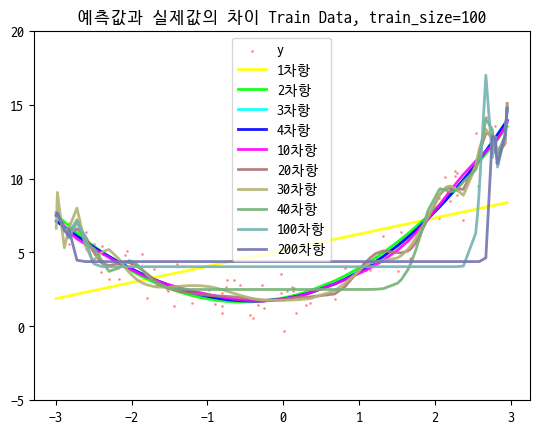

In [22]:
# 시각화
plt.scatter(X, y, s=5, alpha=0.3, marker='.', color=colors[0])
plt.title(f'예측값과 실제값의 차이 Train Data, train_size={m}')
legends = ['y']
for idx, degree in enumerate(degrees):
    # plt.scatter(X, train_preds[idx], s=5, alpha=1, marker='.', color=colors[idx+1])
    plt.plot(X, train_preds[idx], color=colors[idx+1], alpha=.9, linewidth=2)
    legends.append(f'{degree}차항')
plt.legend(legends)
plt.ylim(-5, 20)
plt.show()

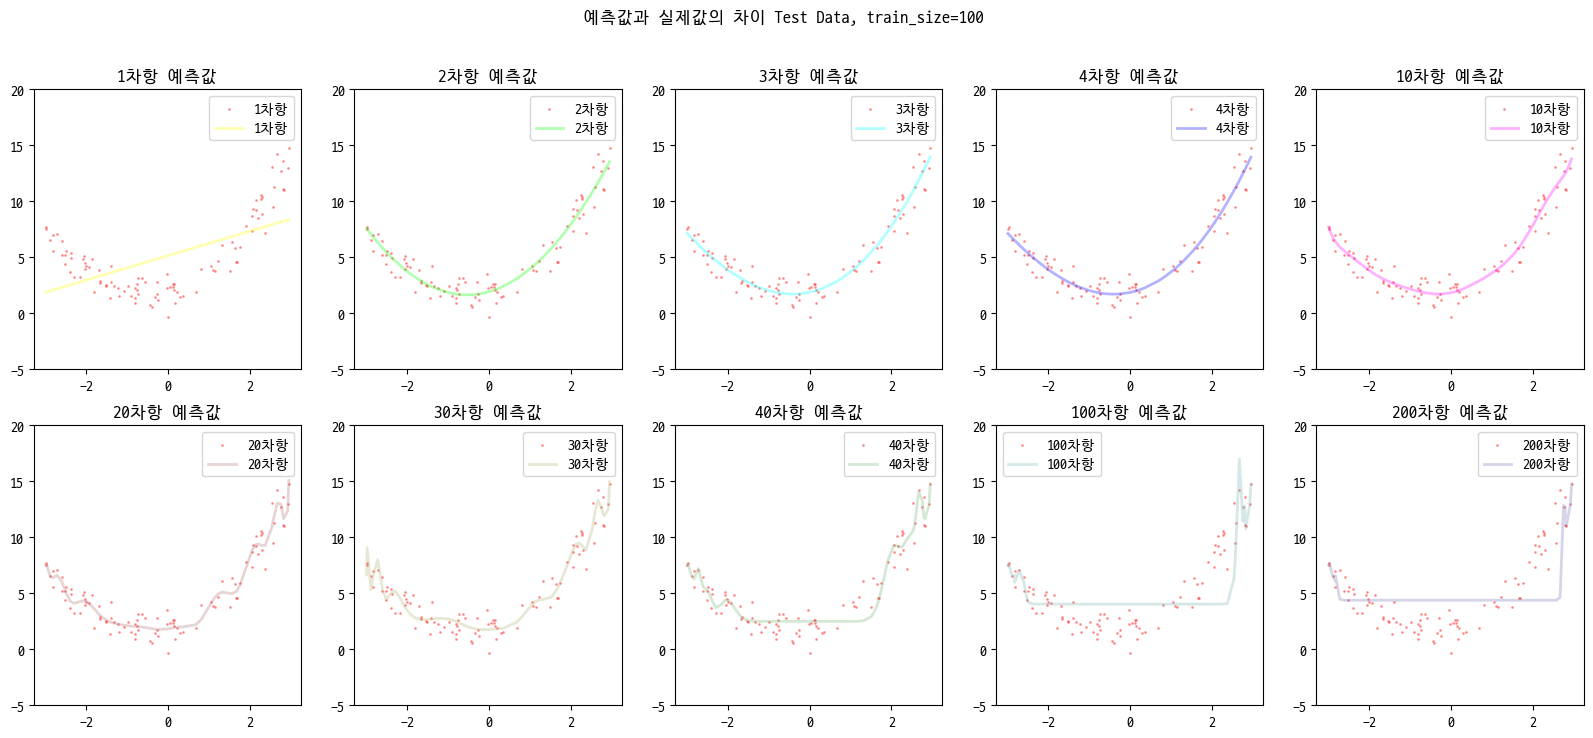

In [23]:
lens = len(degrees)//2+1
if lens % 2 == 0:
    lens -= 1
fig, axes = plt.subplots(2, lens, figsize=(20, 8))
fig.suptitle(f'예측값과 실제값의 차이 Test Data, train_size={m}')
for idx, degree in enumerate(degrees):
    ax = axes[idx//lens, idx%lens]
    ax.scatter(X, y, s=5, alpha=0.3, marker='.', color=colors[0])
    ax.set_title(f'{degree}차항 예측값')
    ax.plot(X, train_preds[idx], color=colors[idx+1], alpha=.3, linewidth=2)
    ax.legend([f'{degree}차항', f'{degree}차항'])
    ax.set_ylim(-5, 20)
plt.show()

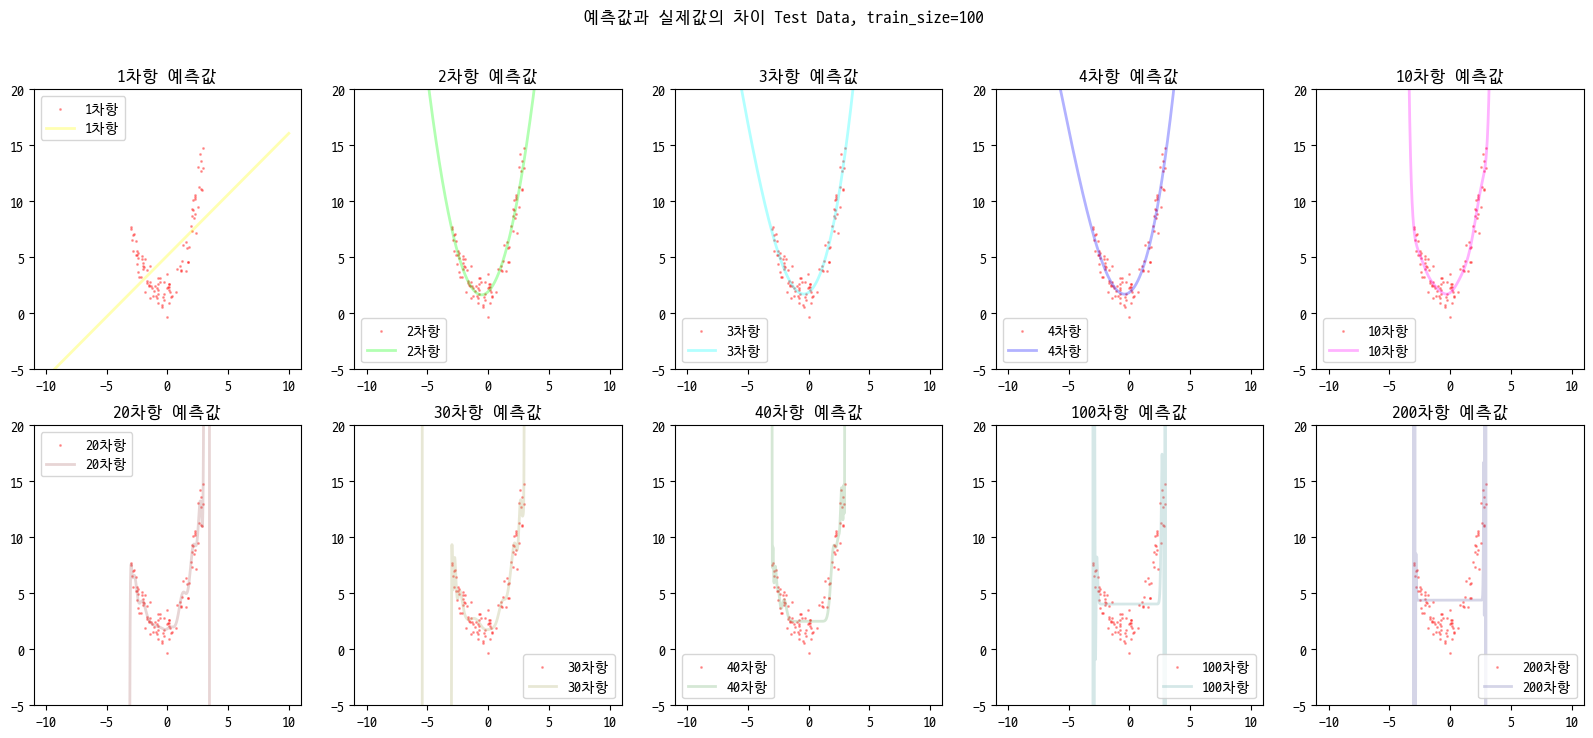

In [24]:
lens = len(degrees)//2+1
if lens % 2 == 0:
    lens -= 1
fig, axes = plt.subplots(2, lens, figsize=(20, 8))
fig.suptitle(f'예측값과 실제값의 차이 Test Data, train_size={m}')
for idx, degree in enumerate(degrees):
    ax = axes[idx//lens, idx%lens]
    ax.scatter(X, y, s=5, alpha=0.3, marker='.', color=colors[0])
    ax.set_title(f'{degree}차항 예측값')
    ax.plot(X_new, test_preds[idx], color=colors[idx+1], alpha=.3, linewidth=2)
    ax.legend([f'{degree}차항', f'{degree}차항'])
    ax.set_ylim(-5, 20)
plt.show()

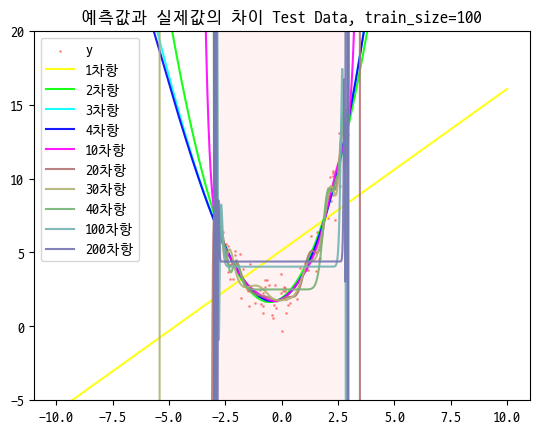

In [25]:
# 시각화
plt.scatter(X, y, s=5, alpha=0.3, marker='.', color=colors[0])
plt.title(f'예측값과 실제값의 차이 Test Data, train_size={m}')
legends = ['y']
for idx, degree in enumerate(degrees):
    # plt.scatter(X_new, test_preds[idx], s=5, alpha=0.8, marker='.', color=colors[idx+1])
    plt.plot(X_new, test_preds[idx], color=colors[idx+1], alpha=.9, linewidth=1.5)
    legends.append(f'{degree}차항')
# 원래 데이터 x값의 범위에 색칠
plt.fill_between(X[:, 0], -5, 20, alpha=0.05, color='red')
plt.legend(legends)
plt.ylim(-5, 20)
plt.show()

### PolynomialFeatures 예제

In [26]:
data = np.arange(12).reshape(6, 2) # data : 6개, 2개의 feature
data

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [27]:
pn = PolynomialFeatures(degree=2, include_bias=False)
data_poly = pn.fit_transform(data)
data_poly

array([[  0.,   1.,   0.,   0.,   1.],
       [  2.,   3.,   4.,   6.,   9.],
       [  4.,   5.,  16.,  20.,  25.],
       [  6.,   7.,  36.,  42.,  49.],
       [  8.,   9.,  64.,  72.,  81.],
       [ 10.,  11., 100., 110., 121.]])

$ x_0 = x_0 $ | $ x_0 = x_1 $ | $ x_1 = (x_0)^2 $ | $ x_3 = x_0x_1 $ | $ x_4 = (x_1)^2 $

### PolynomialFeatures를 Boston Dataset에 적용

In [28]:
from dataset import get_boston_dataset
X_train, X_test, y_train, y_test = get_boston_dataset()

In [29]:
degree = 2
pn_boston = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = pn_boston.fit_transform(X_train)
X_test_poly = pn_boston.transform(X_test)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 모델 생성 학습 추론 평가

In [31]:
# 모델 생성
from sklearn.linear_model import LinearRegression
lr_boston_poly = LinearRegression()
lr_boston_poly.fit(X_train_poly_scaled, y_train)
lr_boston_not_poly = LinearRegression()
lr_boston_not_poly.fit(X_train_scaled, y_train)

pred_train_poly = lr_boston_poly.predict(X_train_poly_scaled)
pred_test_poly = lr_boston_poly.predict(X_test_poly_scaled)
pred_train_not_poly = lr_boston_not_poly.predict(X_train_scaled)
pred_test_not_poly = lr_boston_not_poly.predict(X_test_scaled)

pmr(y_train, pred_train_poly, title=f'PolynomialFeatures train, degree={degree}')
pmr(y_test, pred_test_poly, title=f'PolynomialFeatures test, degree={degree}')
pmr(y_train, pred_train_not_poly, title=f'Not PolynomialFeatures train')
pmr(y_test, pred_test_not_poly, title=f'Not PolynomialFeatures test')

==========PolynomialFeatures train, degree=2==========
MAE: 1.6331267576295354
MSE: 5.050165024676634
RMSE: 2.2472572226331
R2 Score: 0.9388786126811524
==========PolynomialFeatures test, degree=2==========
MAE: 3.042183881618866
MSE: 37.099542185086165
RMSE: 6.090939351617791
R2 Score: 0.5866282794436412
==========Not PolynomialFeatures train==========
MAE: 3.3851968027571853
MSE: 23.327378902305774
RMSE: 4.829842533903748
R2 Score: 0.717672243569379
==========Not PolynomialFeatures test==========
MAE: 3.1635051115298656
MSE: 18.96659799622575
RMSE: 4.35506578552216
R2 Score: 0.788669757494949


In [32]:
# 시각화 Train
plt.scatter(y_train, pred_train, s=5, alpha=0.3, marker='.', color=colors[0])
plt.title(f'예측값과 실제값 Train Data, degree={degree}')
plt.show()

NameError: name 'pred_train' is not defined

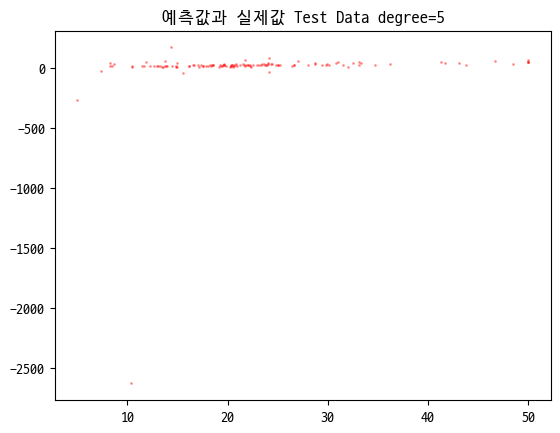

In [ ]:
# 시각화 Test
plt.scatter(y_test, pred_test, s=5, alpha=0.3, marker='.', color=colors[0])
plt.title(f'예측값과 실제값 Test Data degree={degree}')
plt.show()

In [ ]:
## pipeline 적용
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

# pipeline 생성
pipe_lr = make_pipeline(
    PolynomialFeatures(include_bias=False),
    StandardScaler(),
    LinearRegression()
)

pipe_lr.steps

[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
 ('standardscaler', StandardScaler()),
 ('linearregression', LinearRegression())]

In [ ]:
# pipeline 학습
pipe_lr.fit(X_train, y_train)
pred_test = pipe_lr.predict(X_test)
pmr(y_test, pred_test, title='Pipeline')

==========Pipeline==========
MAE: 3.042183881618866
MSE: 37.099542185086165
RMSE: 6.090939351617791
R2 Score: 0.5866282794436412


In [ ]:
poly_scaler = make_pipeline(
    PolynomialFeatures(include_bias=False),
    StandardScaler()
)

result = poly_scaler.fit_transform(X_train)
result.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

## 규제 (Regularization)
- 선형 회귀 모델에서 과대적합(Overfitting) 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용한다.
- 입력데이터의 Feature들이 너무 많은 경우 Overfitting이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 Overfitting이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.(0에 가까운 값으로 만들어 준다.)
        - LinearRegression의 규제는 학습시 계산하는 오차를 키워서 모델이 오차를 줄이기 위해 가중치를 0에 가까운 값으로 만들도록 하는 방식을 사용한다.
        - L1 규제 (Lasso)
        - L2 규제 (Ridge)
    

## Ridge Regression (L2 규제)
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 예측에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

> **손실함수(Loss Function):** 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.

In [85]:
train_size = 100
X = 6 * np.random.rand(train_size, 1) - 3
a, b, c, d = 0.5, 1, 2, 3
f = lambda x: a*x**3 + b*x**2 + c*x + d + + np.random.normal(0, 1, (x.size, 1))
X.sort(axis=0)
y = f(X)

test_size = 200
test_X = np.linspace(-6, 6, test_size).reshape(-1, 1)
test_y = f(test_X)

In [155]:
print(r'${a}x^3 + {b}x^2 + {c}x + {d}$'.format(a=a, b=b, c=c, d=d))

$0.5x^3 + 1x^2 + 2x + 3$


$0.5x^3 + 1x^2 + 2x + 3$

(-150.0, 150.0)

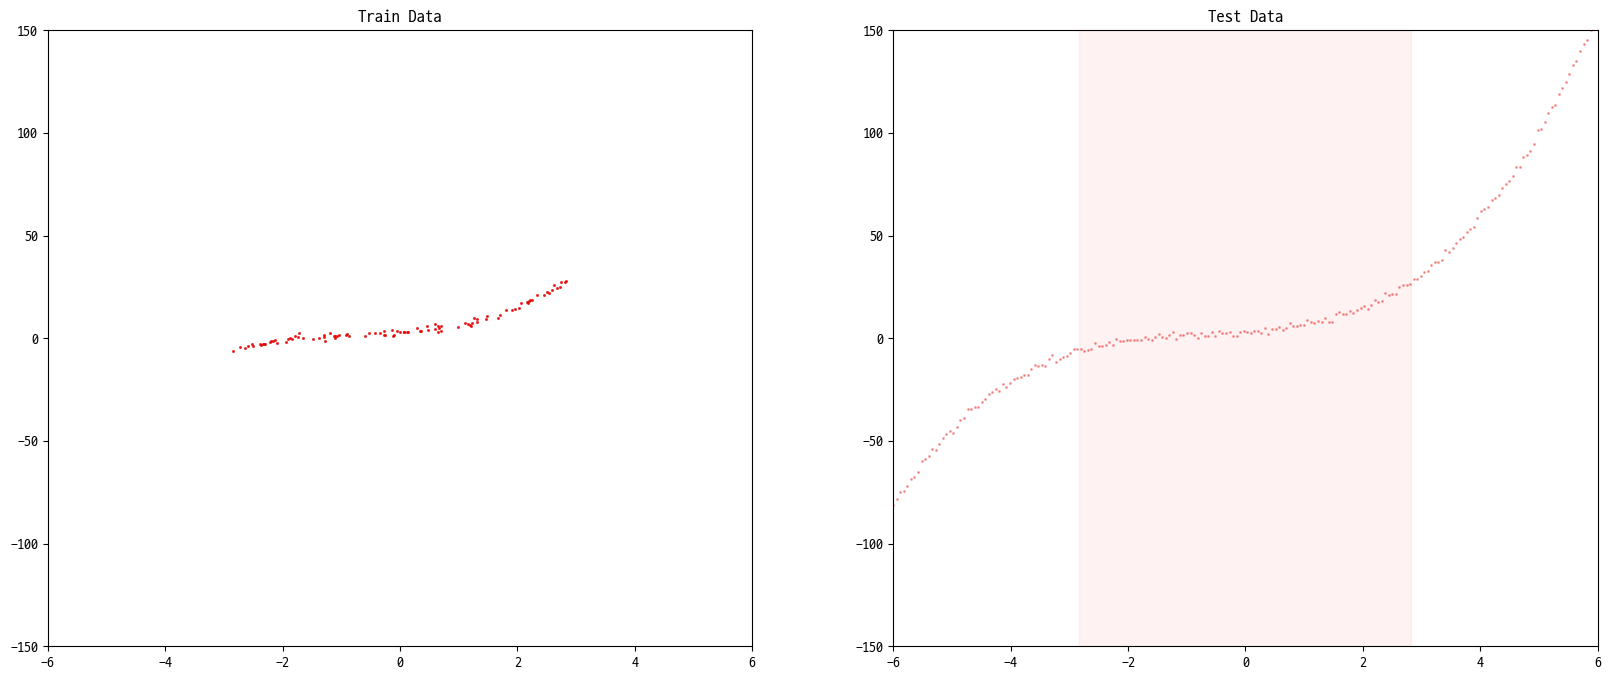

In [310]:
# 시각화
xlims = (-6, 6)
ylims = (-150, 150)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.scatter(X, y, s=5, alpha=0.5, marker='.', color=colors[0])
ax1.set_title('Train Data')
ax1.set_xlim(xlims)
ax1.set_ylim(ylims)
ax1.scatter(X, y, s=5, alpha=0.5, marker='.', color=colors[0])
ax2.scatter(test_X, test_y, s=5, alpha=0.3, marker='.', color=colors[0])
ax2.fill_between(X[:, 0], -150, 150, alpha=0.05, color='red')
ax2.set_title('Test Data')
ax2.set_xlim(xlims)
ax2.set_ylim(ylims)

In [340]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
degree = 6
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 10, 100, 500, 1000]
#ridge
train_preds = []
test_preds = []
coef_df = pd.DataFrame()
bias_list = []
L2_list = []
r2_train_list = []
r2_list = []
for alpha in alphas:
    ridge_pipe = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        StandardScaler(),
        Ridge(alpha=alpha)
    )
    
    ridge_pipe.fit(X, y)
    train_pred = ridge_pipe.predict(X)
    test_pred = ridge_pipe.predict(test_X)
    train_preds.append(train_pred)
    test_preds.append(test_pred)
    coef_df[f'alpha {alpha}'] = ridge_pipe.steps[2][1].coef_.reshape(-1)
    bias_list.append(ridge_pipe.steps[2][1].intercept_[0])
    L2_list.append(np.sum(ridge_pipe.steps[2][1].coef_**2))
    r2_train_list.append(r2_score(y, train_pred))
    r2_list.append(r2_score(test_y, test_pred))

df = coef_df.T
df['bias'] = bias_list
df['L2'] = L2_list
df['r2'] = r2_list
df

,0,1,2,3,4,5,bias,L2,r2
alpha 0.0001,3.467990,1.919726,4.500679,1.793769,0.004534,-1.182590,6.073402,40.584557,-1.668102
alpha 0.001,3.469364,1.921986,4.496630,1.787825,0.007314,-1.178787,6.073402,40.536109,-1.651073
alpha 0.01,3.482773,1.943306,4.457043,1.731588,0.034516,-1.142760,6.073402,40.076864,-1.492630
alpha 0.1,3.590188,2.074830,4.133656,1.373277,0.258556,-0.909731,6.073402,37.061834,-0.600063
alpha 1,3.869032,2.174499,3.107020,0.829752,1.011154,-0.468246,6.073402,31.281604,0.298585
alpha 1.5,3.880525,2.131523,2.945328,0.786878,1.149424,-0.387589,6.073402,30.367397,0.340298
alpha 1.6,3.879705,2.122136,2.922444,0.781604,1.170429,-0.373972,6.073402,30.216915,0.344307
alpha 1.7,3.878210,2.112649,2.901687,0.777007,1.189917,-0.360932,6.073402,30.073499,0.347303
alpha 1.8,3.876140,2.103103,2.882772,0.772982,1.208081,-0.348401,6.073402,29.936222,0.349385
alpha 1.9,3.873577,2.093530,2.865466,0.769442,1.225082,-0.336324,6.073402,29.804341,0.350637


In [341]:
colors = rand_hex_list_hsv(len(alphas)//2+1, s=1.0, v=.9)
colors = colors + rand_hex_list_hsv(len(alphas)//2+1, s=.35, v=.7)

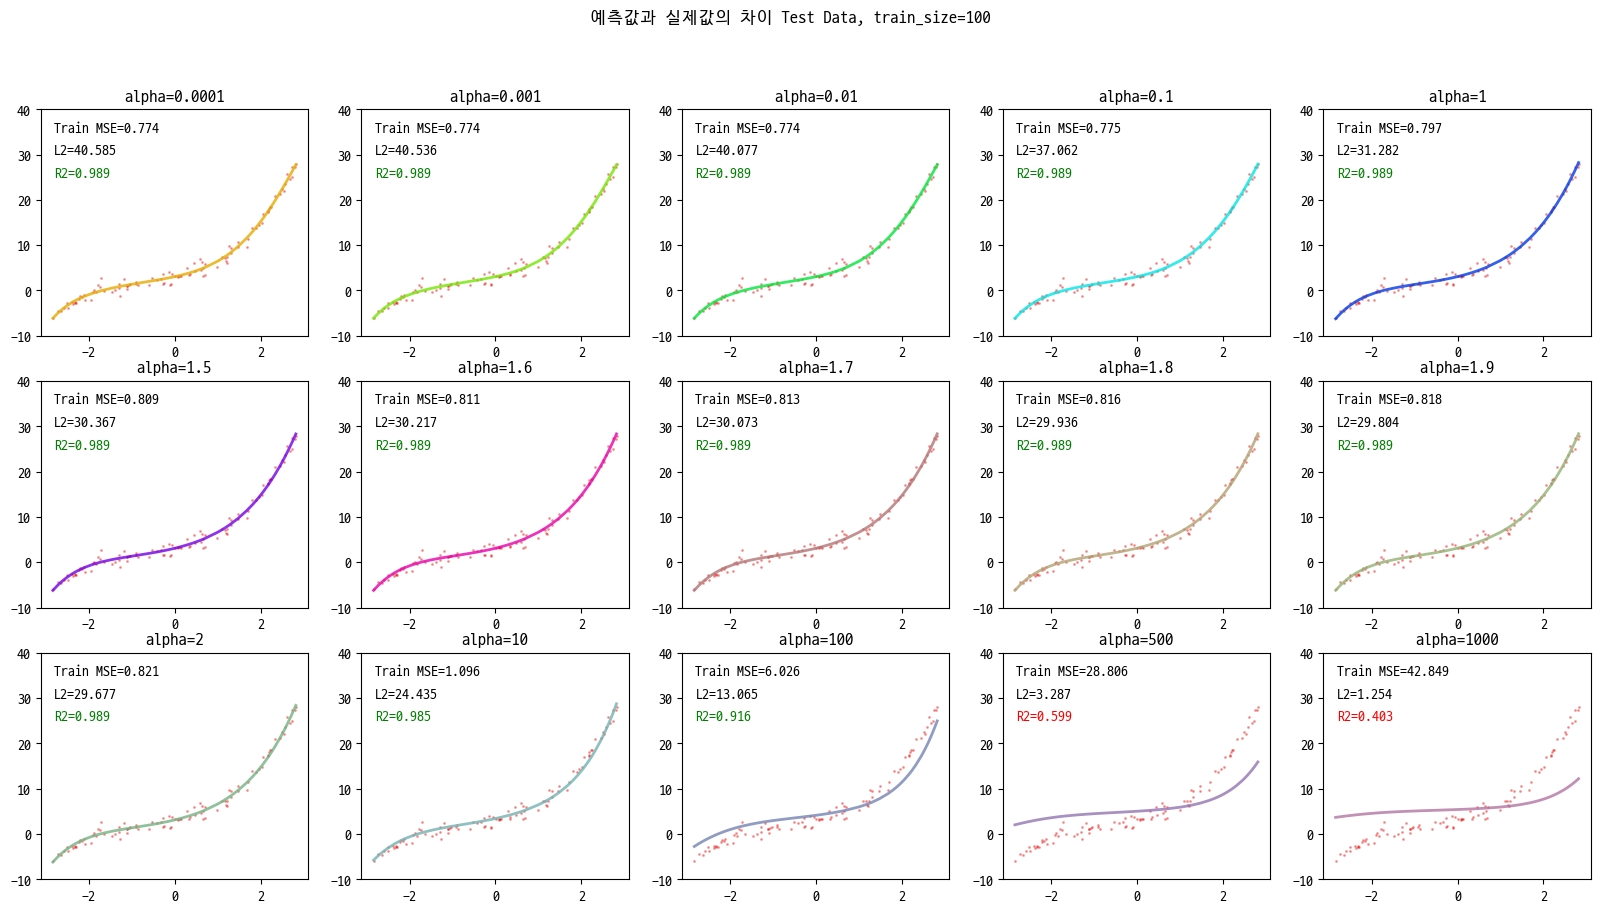

In [342]:
lens = len(alphas)//3
if lens % 3 == 0:
    lens += 1
elif lens % 3 == 1:
    lens += 1
else:
    lens += 0
fig, axes = plt.subplots(3, lens, figsize=(20, 10))
fig.suptitle(f'예측값과 실제값의 차이 Test Data, train_size={m}')
for idx, alpha in enumerate(alphas):
    ax = axes[idx//lens, idx%lens]
    ax.scatter(X, y, s=5, alpha=0.3, marker='.', color=colors[0])
    ax.set_title(f'alpha={alpha}')
    ax.plot(X, train_preds[idx], color=colors[idx+1], alpha=.8, linewidth=2)
    mse_score = mse(y, train_preds[idx])
    ax.text(0.05, 0.9, f'Train MSE={mse_score:.3f}', transform=ax.transAxes)
    l2_score = L2_list[idx]
    ax.text(0.05, 0.8, f'L2={l2_score:.3f}', transform=ax.transAxes)
    r2_score = r2_train_list[idx]
    c = 'green' if r2_score > 0.9 else 'red'
    ax.text(0.05, 0.7, f'R2={r2_score:.3f}', transform=ax.transAxes, color=c)
    ax.set_ylim(-10, 40)
plt.show()

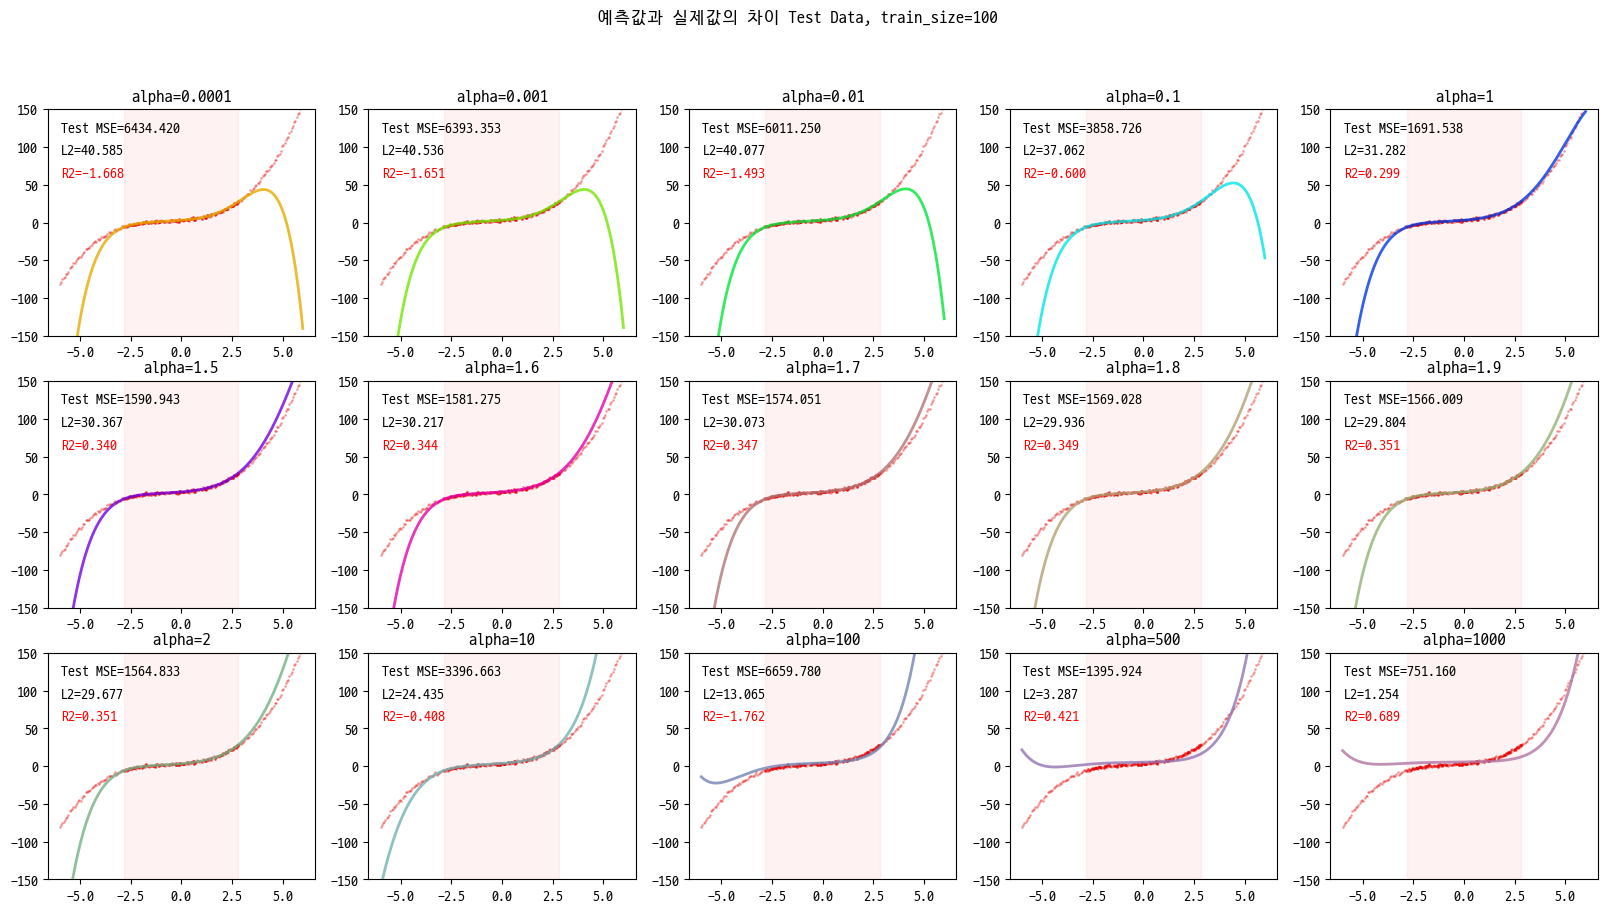

In [343]:
lens = len(alphas)//3
if lens % 3 == 0:
    lens += 1
elif lens % 3 == 1:
    lens += 1
else:
    lens += 0
fig, axes = plt.subplots(3, lens, figsize=(20, 10))
fig.suptitle(f'예측값과 실제값의 차이 Test Data, train_size={m}')
for idx, alpha in enumerate(alphas):
    ax = axes[idx//lens, idx%lens]
    ax.scatter(X, y, s=5, alpha=0.5, marker='.', color=colors[0])
    ax.scatter(test_X, test_y, s=5, alpha=0.25, marker='.', color=colors[0])
    ax.set_title(f'alpha={alpha}')
    ax.plot(test_X, test_preds[idx], color=colors[idx+1], alpha=.8, linewidth=2)
    mse_score = mse(test_y, test_preds[idx])
    ax.text(0.05, 0.9, f'Test MSE={mse_score:.3f}', transform=ax.transAxes)
    l2_score = L2_list[idx]
    ax.text(0.05, 0.8, f'L2={l2_score:.3f}', transform=ax.transAxes)
    r2_score = r2_list[idx]
    c = 'green' if r2_score > 0.9 else 'red'
    ax.text(0.05, 0.7, f'R2={r2_score:.3f}', transform=ax.transAxes, color=c)
    ax.set_ylim(ylims)
    ax.fill_between(X[:, 0], 150, -150, color='red', alpha=.05)
plt.show()

## Lasso(Least Absolut Shrinkage and Selection Operator) Regression (L1 규제)

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

In [328]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
degree = 6
alphas = [0.0001, 0.001, 0.005, 0.01, 0.1, 1, 2, 3, 5, 6, 7, 8]
#ridge
train_preds = []
test_preds = []
coef_df = pd.DataFrame()
bias_list = []
L1_list = []
r2_list = []
r2_train_list = []

for alpha in alphas:
    lasso = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        StandardScaler(),
        Lasso(alpha=alpha)
    )
    
    lasso.fit(X, y)
    train_pred = lasso.predict(X)
    test_pred = lasso.predict(test_X)
    train_preds.append(train_pred)
    test_preds.append(test_pred)
    coef_df[f'alpha {alpha}'] = lasso.steps[2][1].coef_.reshape(-1)
    bias_list.append(lasso.steps[2][1].intercept_[0])
    L1_list.append(np.sum(lasso.steps[2][1].coef_**2))
    r2_train_list.append(r2_score(y, train_pred))
    r2_list.append(r2_score(test_y, test_pred))
    
df = coef_df.T
df['bias'] = bias_list
df['L1'] = L1_list
df['r2'] = r2_list
df

c:\Users\hyenz\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.326e+01, tolerance: 7.181e-01
  model = cd_fast.enet_coordinate_descent(


,0,1,2,3,4,5,bias,L1,r2
alpha 0.0001,3.467080,1.962996,4.504535,1.684196,0.000946,-1.113429,6.073402,40.241072,-1.368816
alpha 0.001,3.469617,2.115603,4.500276,1.279943,0.000000,-0.851431,6.073402,39.129694,-0.387156
alpha 0.005,3.487512,2.587089,4.459485,0.000000,0.013387,-0.010055,6.073402,38.743059,0.999372
alpha 0.01,3.477248,2.573584,4.477053,0.000000,0.000000,-0.000000,6.073402,38.758595,0.999198
alpha 0.1,3.410452,2.489246,4.457094,0.000000,0.000000,0.000000,6.073402,37.693217,0.999061
alpha 1,2.739435,1.645716,4.260344,0.000000,0.000000,0.000000,6.073402,28.363423,0.982760
alpha 2,1.994154,0.708475,4.041461,0.000000,0.000000,0.000000,6.073402,20.811997,0.932779
alpha 3,1.303832,0.000000,3.749429,0.000000,0.000000,0.000000,6.073402,15.758193,0.860255
alpha 5,0.264497,0.000000,2.711450,0.000000,0.000000,0.000000,6.073402,7.421919,0.697747
alpha 6,0.000000,0.000000,1.956271,0.000000,0.000000,0.000000,6.073402,3.826997,0.536663


In [329]:
colors = rand_hex_list_hsv(len(alphas)//2+1, s=1.0, v=.9)
colors = colors + rand_hex_list_hsv(len(alphas)//2+1, s=.35, v=.7)

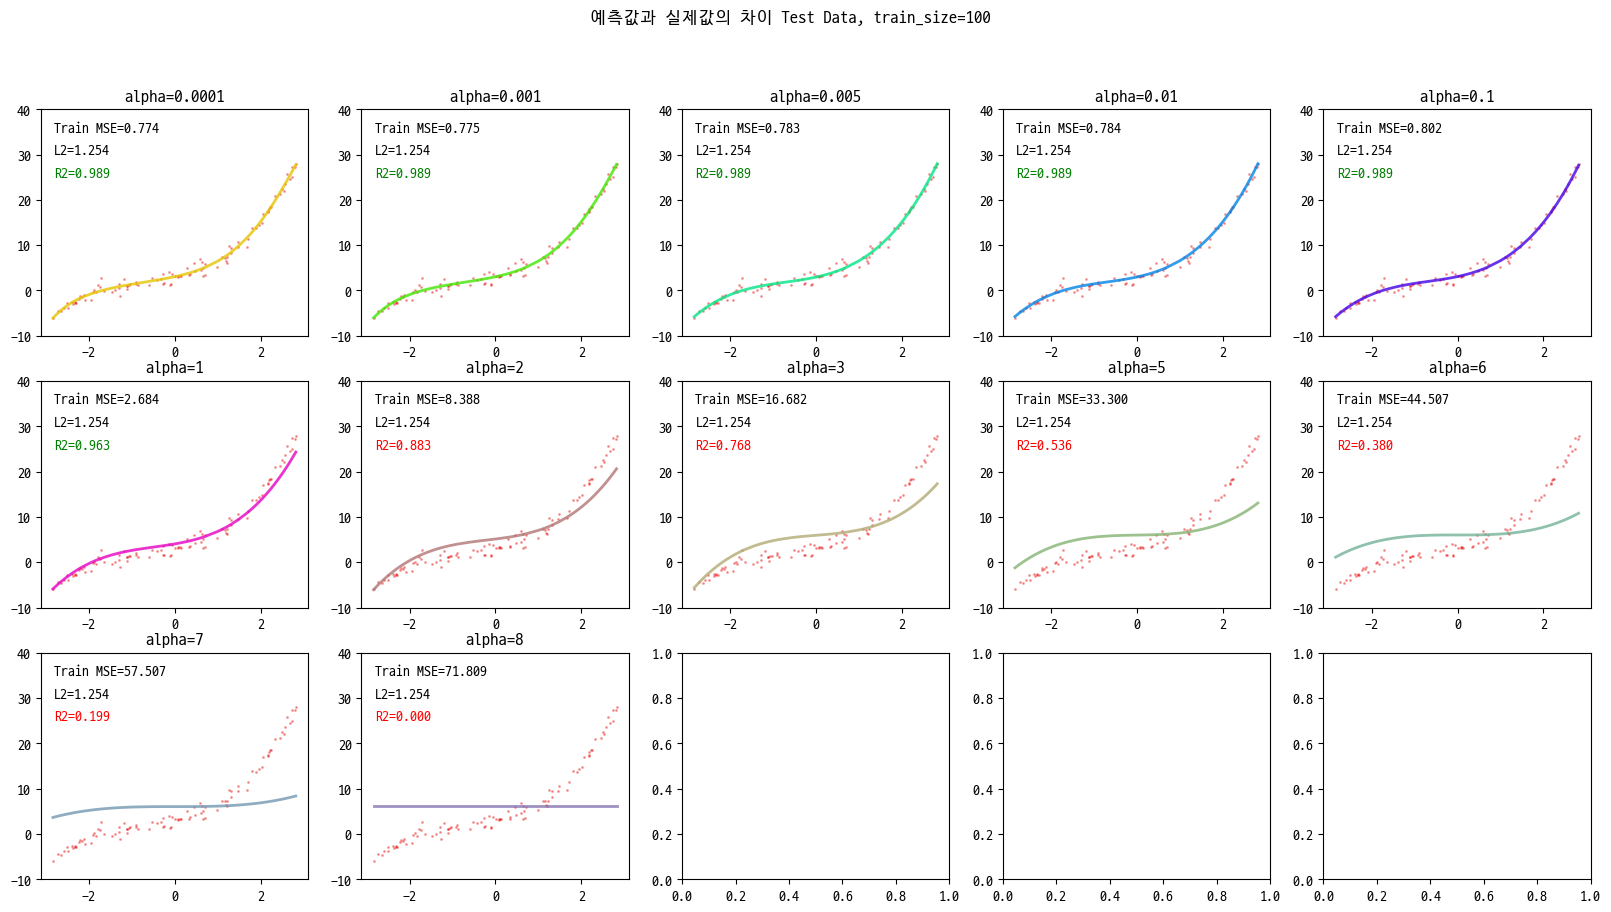

In [330]:
lens = len(alphas)//3
if lens % 3 == 0:
    lens += 1
elif lens % 3 == 1:
    lens += 1
else:
    lens += 0
fig, axes = plt.subplots(3, lens, figsize=(20, 10))
fig.suptitle(f'예측값과 실제값의 차이 Test Data, train_size={m}')
for idx, alpha in enumerate(alphas):
    ax = axes[idx//lens, idx%lens]
    ax.scatter(X, y, s=5, alpha=0.3, marker='.', color=colors[0])
    ax.set_title(f'alpha={alpha}')
    ax.plot(X, train_preds[idx], color=colors[idx+1], alpha=.8, linewidth=2)
    mse_score = mse(y, train_preds[idx])
    ax.text(0.05, 0.9, f'Train MSE={mse_score:.3f}', transform=ax.transAxes)
    l1_score = L1_list[idx]
    ax.text(0.05, 0.8, f'L2={l2_score:.3f}', transform=ax.transAxes)
    r2_score = r2_train_list[idx]
    c = 'green' if r2_score > 0.9 else 'red'
    ax.text(0.05, 0.7, f'R2={r2_score:.3f}', transform=ax.transAxes, color=c)
    ax.set_ylim(-10, 40)
plt.show()

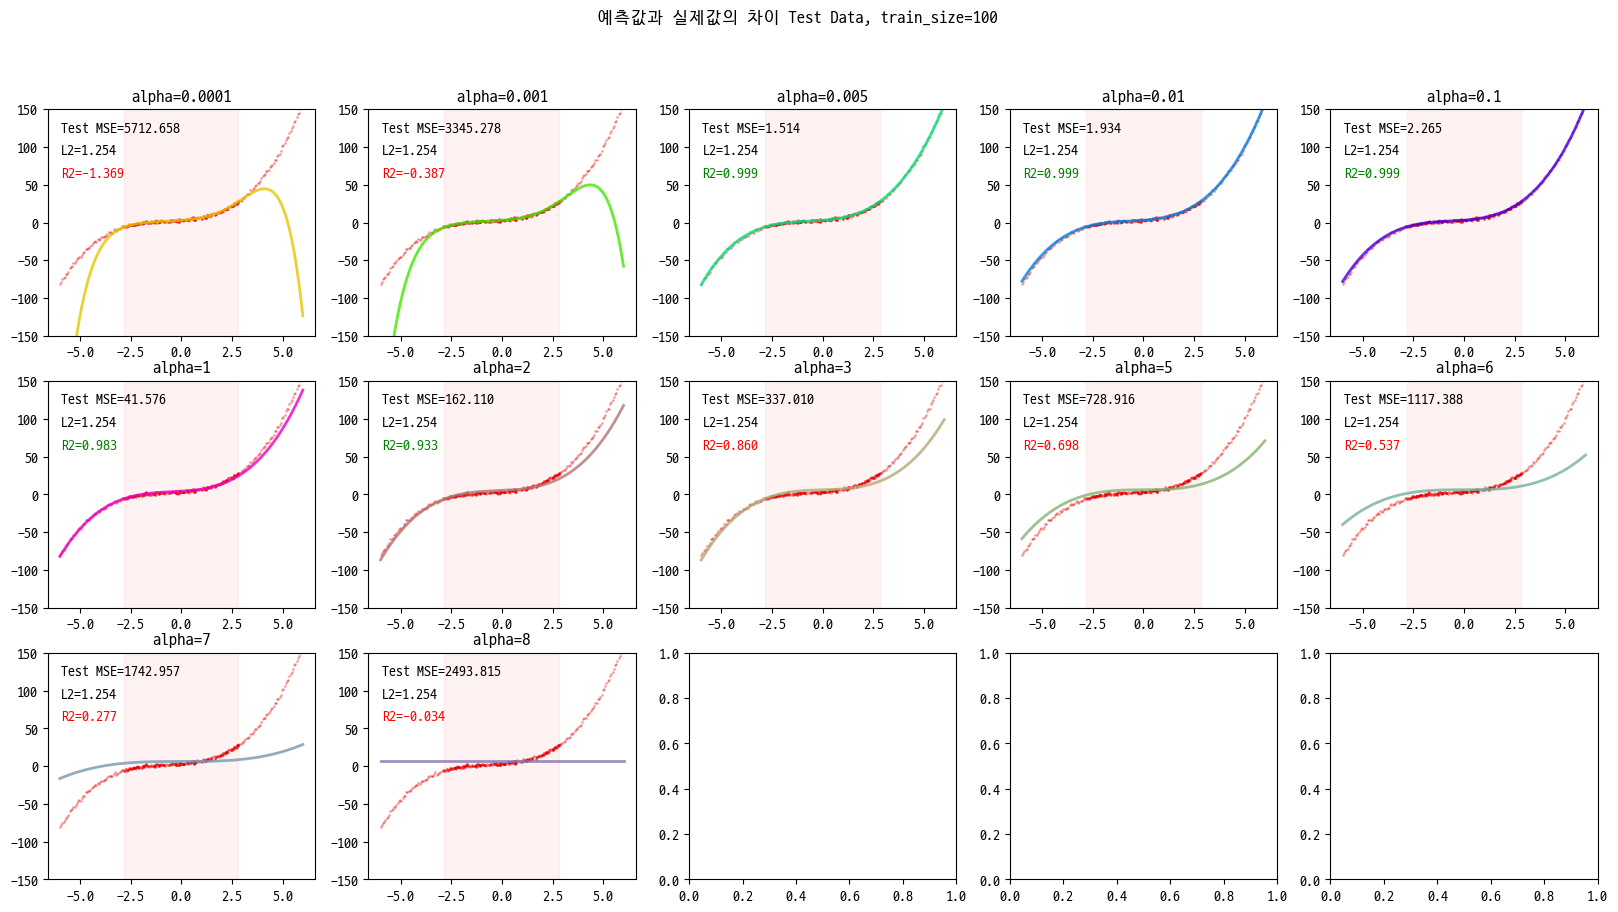

In [331]:
lens = len(alphas)//3
if lens % 3 == 0:
    lens += 1
elif lens % 3 == 1:
    lens += 1
else:
    lens += 0
fig, axes = plt.subplots(3, lens, figsize=(20, 10))
fig.suptitle(f'예측값과 실제값의 차이 Test Data, train_size={m}')
for idx, alpha in enumerate(alphas):
    ax = axes[idx//lens, idx%lens]
    ax.scatter(X, y, s=5, alpha=0.5, marker='.', color=colors[0])
    ax.scatter(test_X, test_y, s=5, alpha=0.25, marker='.', color=colors[0])
    ax.set_title(f'alpha={alpha}')
    ax.plot(test_X, test_preds[idx], color=colors[idx+1], alpha=.8, linewidth=2)
    mse_score = mse(test_y, test_preds[idx])
    ax.text(0.05, 0.9, f'Test MSE={mse_score:.3f}', transform=ax.transAxes)
    l1_score = L1_list[idx]
    ax.text(0.05, 0.8, f'L2={l2_score:.3f}', transform=ax.transAxes)
    r2_score = r2_list[idx]
    c = 'green' if r2_score > 0.9 else 'red'
    ax.text(0.05, 0.7, f'R2={r2_score:.3f}', transform=ax.transAxes, color=c)
    ax.set_ylim(ylims)
    ax.fill_between(X[:, 0], 150, -150, color='red', alpha=.05)
plt.show()

# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 **Ridge**를 사용한다.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 **Lasso** 사용한다. 